In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('MNC_salaries.csv')
ds

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [3]:
ds.dtypes

Name         object
Team         object
Number        int64
Position     object
Age           int64
DOJ          object
Weight        int64
College      object
Salary      float64
dtype: object

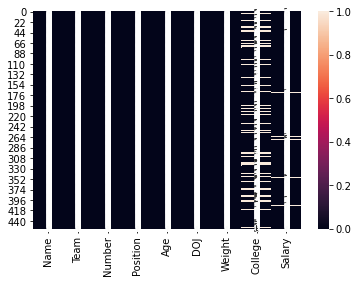

In [4]:
sb.heatmap(ds.isnull(),annot=True)
plt.show()

In [5]:
ds.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [7]:
ds.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'DOJ', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [8]:
ds.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


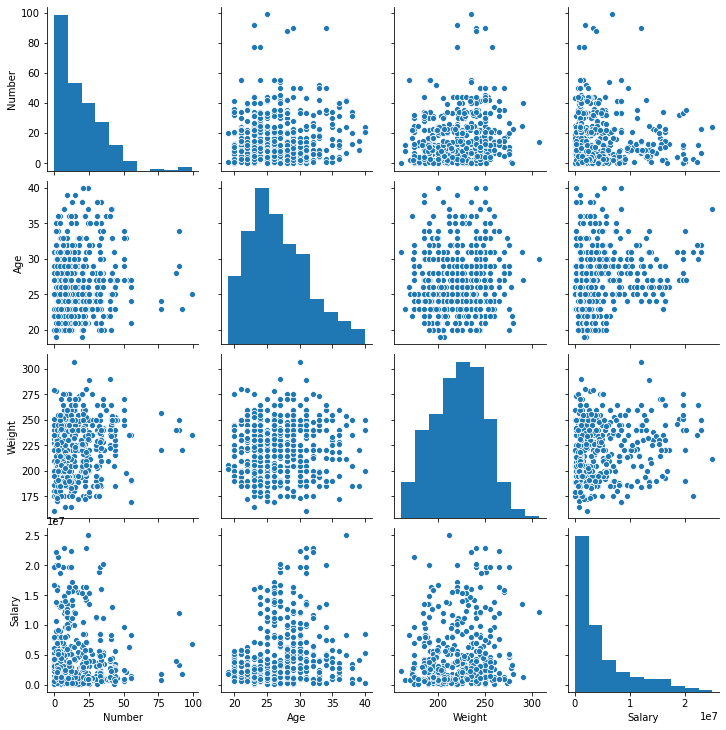

In [9]:
sb.pairplot(ds)

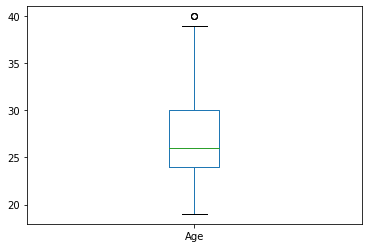

In [10]:
ds['Age'].plot.box()

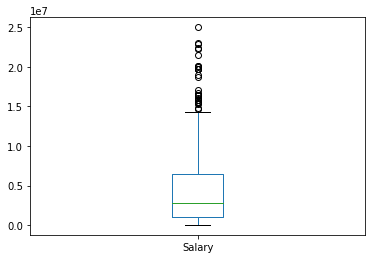

In [11]:
ds['Salary'].plot.box()

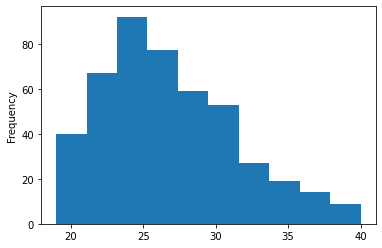

In [12]:
ds['Age'].plot.hist()

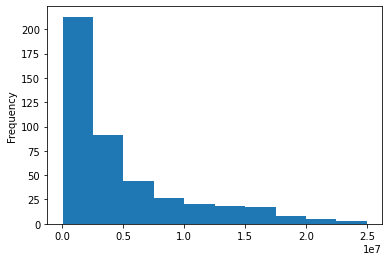

In [13]:
ds['Salary'].plot.hist()

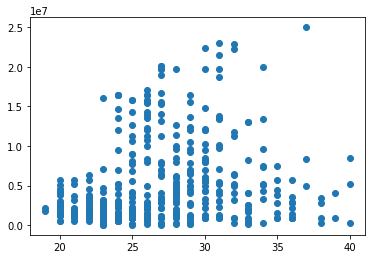

In [14]:
plt.scatter(ds['Age'],ds['Salary'])

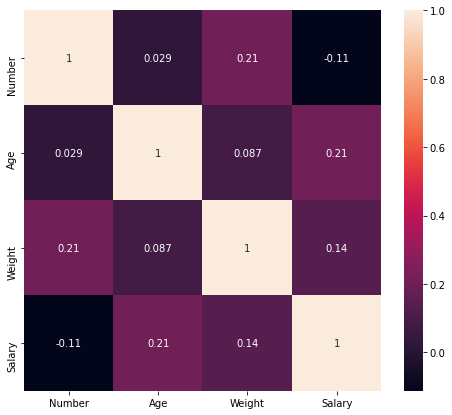

In [15]:
corr_hmap=ds.corr()
plt.figure(figsize=(8,7))
sb.heatmap(corr_hmap,annot=True)
plt.show()

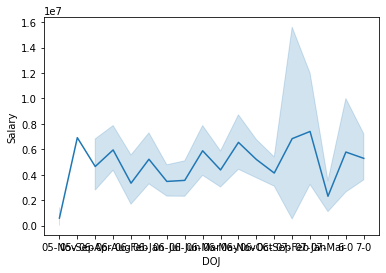

In [16]:
sb.lineplot(x=ds["DOJ"],y=ds["Salary"],data=ds)
plt.show()

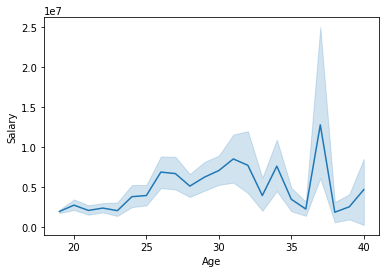

In [17]:
sb.lineplot(x=ds["Age"],y=ds["Salary"],data=ds)
plt.show()

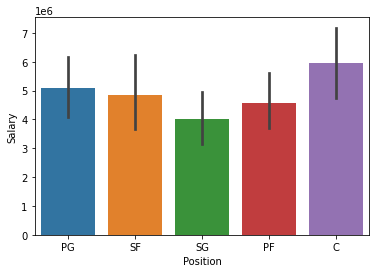

In [18]:
sb.barplot(x=ds["Position"],y=ds["Salary"],data=ds)
plt.show()

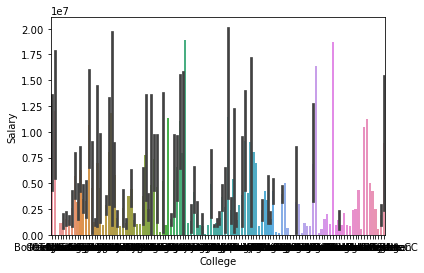

In [19]:
sb.barplot(x=ds["College"],y=ds["Salary"],data=ds)
plt.show()

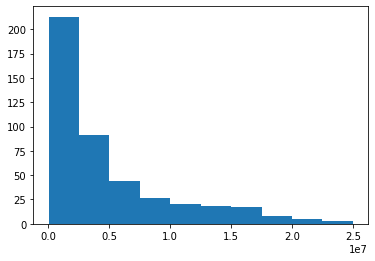

In [22]:
plt.hist(x="Salary",bins=10,data=ds)
plt.show()

In [23]:
ds.drop(['Name','Number','DOJ','Weight'],axis=1,inplace=True)

In [24]:
ds.head()

,Team,Position,Age,College,Salary
0,Boston Celtics,PG,25,Texas,7730337.0
1,Boston Celtics,SF,25,Marquette,6796117.0
2,Boston Celtics,SG,27,Boston University,NaN
3,Boston Celtics,SG,22,Georgia State,1148640.0
4,Boston Celtics,PF,29,NaN,5000000.0


In [25]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
ds.College=imputer.fit_transform(ds['College'].values.reshape(-1,1))

In [26]:
ds.head()

,Team,Position,Age,College,Salary
0,Boston Celtics,PG,25,Texas,7730337.0
1,Boston Celtics,SF,25,Marquette,6796117.0
2,Boston Celtics,SG,27,Boston University,NaN
3,Boston Celtics,SG,22,Georgia State,1148640.0
4,Boston Celtics,PF,29,Kentucky,5000000.0


In [27]:
imputer=SimpleImputer(missing_values=np.NaN,strategy='median')
ds.Salary=imputer.fit_transform(ds['Salary'].values.reshape(-1,1))

In [28]:
ds.head()

,Team,Position,Age,College,Salary
0,Boston Celtics,PG,25,Texas,7730337.0
1,Boston Celtics,SF,25,Marquette,6796117.0
2,Boston Celtics,SG,27,Boston University,2839073.0
3,Boston Celtics,SG,22,Georgia State,1148640.0
4,Boston Celtics,PF,29,Kentucky,5000000.0


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Team','Position','College']
for val in list1:
    ds[val]=le.fit_transform(ds[val].astype(str))

In [30]:
ds.head()

,Team,Position,Age,College,Salary
0,1,2,25,93,7730337.0
1,1,3,25,52,6796117.0
2,1,4,27,8,2839073.0
3,1,4,22,33,1148640.0
4,1,1,29,45,5000000.0


In [31]:
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)
ds_final=ds.loc[(z_score<3).all(axis=1)]
print(ds_final.shape)

(457, 5)
(451, 5)


In [32]:
ds_final

,Team,Position,Age,College,Salary
0,1,2,25,93,7730337.0
1,1,3,25,52,6796117.0
2,1,4,27,8,2839073.0
3,1,4,22,33,1148640.0
4,1,1,29,45,5000000.0
...,...,...,...,...,...
452,28,1,20,45,2239800.0
453,28,2,26,11,2433333.0
454,28,2,24,45,900000.0
455,28,0,26,45,2900000.0


In [33]:
ds_final.skew()

Team       -0.014452
Position   -0.010790
Age         0.653281
College     0.257921
Salary      1.511539
dtype: float64

In [34]:
import numpy as np
for col in ds_final.columns:
    if ds_final.skew().loc[col]>0.55:
        ds_final[col]=np.log1p(ds_final[col])

In [35]:
ds_final.skew()

Team       -0.014452
Position   -0.010790
Age         0.307382
College     0.257921
Salary     -0.460267
dtype: float64

In [36]:
ds_x=ds_final.drop(columns=["Salary"])
y=ds_final[["Salary"]]

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [38]:
x.skew()

Team       -0.014452
Position   -0.010790
Age         0.307382
College     0.257921
dtype: float64

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 17 is 0.09541303467838735


In [40]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2")
a_score

array([ 0.07033736,  0.03814324,  0.00329895,  0.03731564, -0.03125913])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=17,test_size=0.20)
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

In [47]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1.2112977916077208
r2_score is:  0.09541303467838735


In [48]:
import joblib
joblib.dump(regr,'MNC_Salaries_reg.pkl')

['MNC_Salaries_reg.pkl']